In [2]:
import numpy as np

In [3]:
def f1_score(precision, recall):
  try:
    return 2 * precision * recall / (precision + recall)
  except:
    return 0.0

In [4]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [5]:
precision = 0.0
recall = 1
f1_score(precision, recall)

0.0

In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\Users\allen\.conda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9755555555555555

In [9]:
y_predict = log_reg.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_predict)


0.9473684210526315

In [12]:
recall_score(y_test, y_predict)

0.8

In [13]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [14]:
log_reg.decision_function(X_test)[:10]

array([-21.43998616, -32.92585928, -16.38657134, -79.86150796,
       -48.11973444, -24.20918576, -44.66800252, -24.2558866 ,
        -1.18098853, -19.03214386])

In [15]:
decision_scores = log_reg.decision_function(X_test)

In [16]:
np.min(decision_scores)

-85.72725591611781

In [17]:
np.max(decision_scores)

19.908109082420317

In [18]:
y_predict_2 = np.array(decision_scores >=-5, dtype='int') 

In [19]:
confusion_matrix(y_test, y_predict_2)

array([[389,  16],
       [  5,  40]], dtype=int64)

In [20]:
precision_score(y_test, y_predict_2)

0.7142857142857143

In [21]:
recall_score(y_test, y_predict_2)

0.8888888888888888

In [22]:
precisions = []
recalls =[]

thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [23]:
for threshold in thresholds:
  y_predict = np.array(decision_scores >= threshold, dtype='int')
  precision = precision_score(y_test, y_predict)
  recall = recall_score(y_test, y_predict)
  precisions.append(precision)
  recalls.append(recall)
  


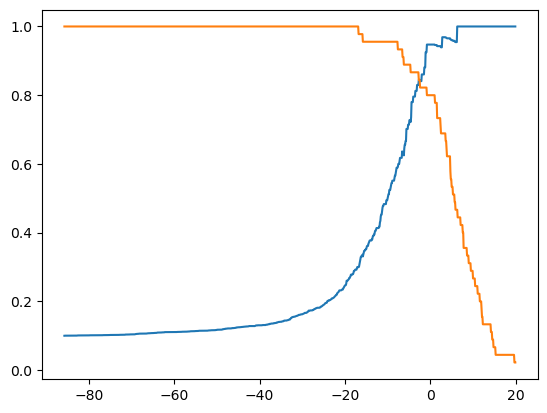

In [24]:
import matplotlib.pyplot as  plt
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

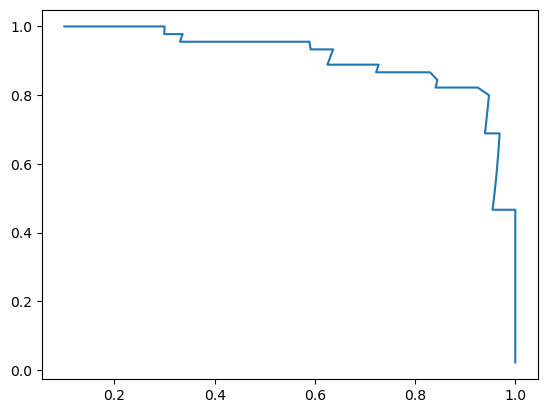

In [25]:
plt.plot(precisions, recalls)
plt.show()

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [27]:
precisions.shape

(451,)

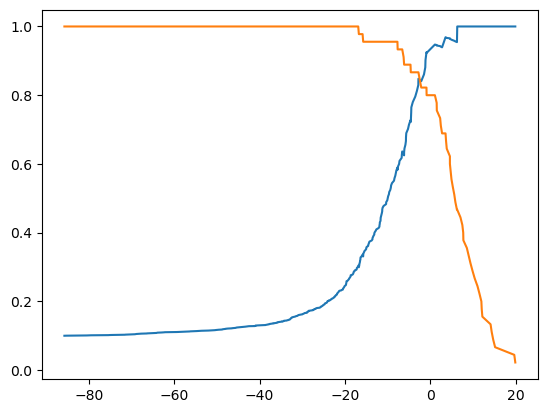

In [28]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

In [29]:
decision_scores = log_reg.decision_function(X_test)

In [30]:
from playML.metrics import FPR, TPR

fprs = []
tprs =[]


thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
  y_predict = np.array(decision_scores >= threshold, dtype='int')
  fpr = FPR(y_test, y_predict)
  tpr = TPR(y_test, y_predict)
  fprs.append(fpr)
  tprs.append(tpr)
  

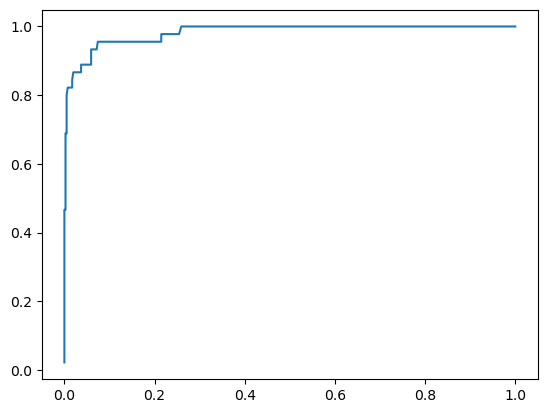

In [31]:
plt.plot(fprs, tprs)
plt.show()

In [32]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

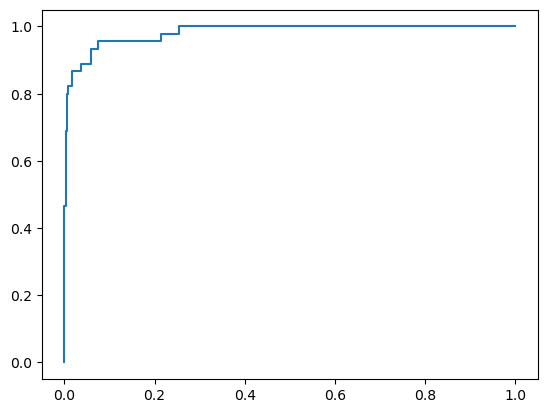

In [34]:
plt.plot(fprs, tprs)

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9824417009602195